In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\casim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\casim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


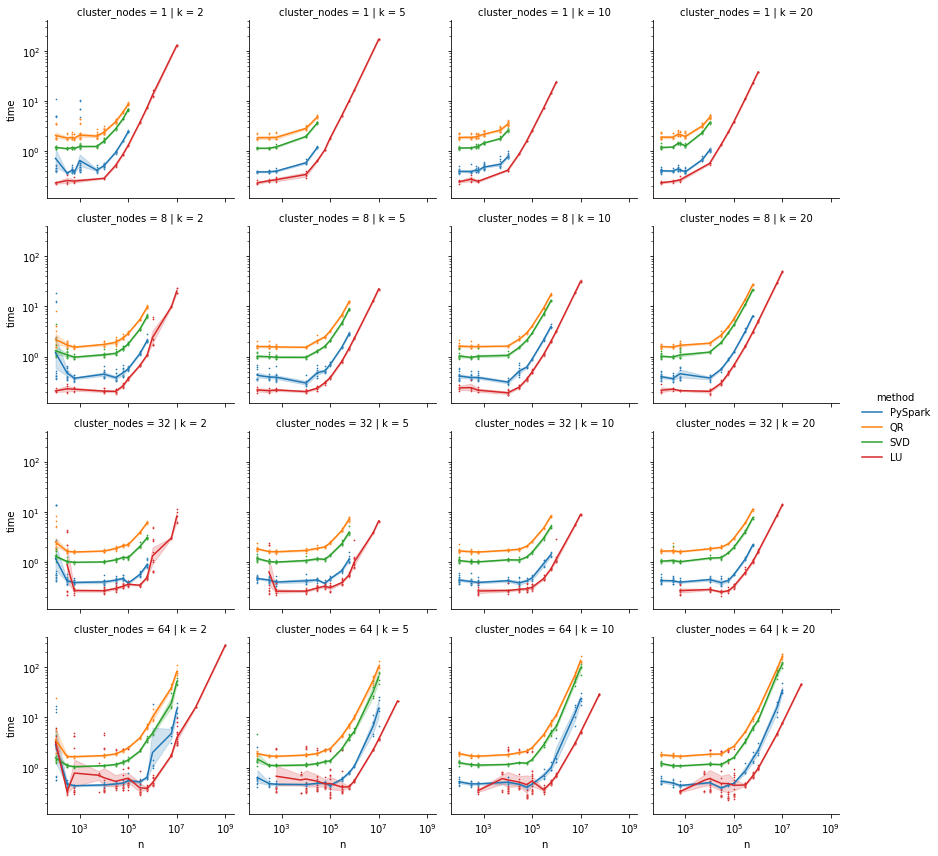

In [5]:
df=pd.read_csv("results.csv")
#df=df[df["run"]>0] #da Spark lazy ist braucht der erste Run oft länger als die Übrigen. Daher hier ignoriert.
df=df[(df["k"]!=3)&(df["k"]<=20)]
g=sns.FacetGrid(df,row="cluster_nodes",col="k",hue="method", sharex=True, subplot_kws={"xscale":"log","yscale":"log"})
g.map_dataframe(sns.lineplot,y="time",x="n")
g.set_xlabels("n (Number of Rows)")
g.set_ylabels("Runtime[s]")
g.add_legend()
# def show_counts(color, data, **kwargs):
#     ax = plt.gca()
#     ax.text(0.5, 0.95, f'Measurements={len(data)}', ha='center', transform=ax.transAxes, weight="light", fontfamily="sans-serif")
# g.map_dataframe(show_counts)
g.map_dataframe(sns.scatterplot,y="time",x="n", s=3)

In [6]:
df["method"].value_counts()

LU         1970
PySpark    1817
SVD        1817
QR         1817
Name: method, dtype: int64